# Julia basics 

Let's explore basic language properties of Julia. Don't hesitate to have a look at the documentation ( https://docs.julialang.org/en/v1/ ) when you're in trouble.

## 1 - Variables and types

Variables store data in the computer's memory.

In [1]:
# assign the value 1 + 2 to a
a = 1 + 2

3

Variables can be of type `Integer`s, `String`s, and way more ! In Julia, all variables have a type.

In [2]:
typeof(a)

Int64

In [3]:
b = "a character string"
typeof(b)

String

`Bool`eans can be `true` or `false`.

In [4]:
typeof(a == 4)

Bool

You can compare objects to types using the `isa` operator

In [5]:
b isa String

true

And even types have the type `DataType` !

In [6]:
typeof(Int64)

DataType

Most conversions that make sense can be done with `convert`

In [ ]:
convert(Float64, a)

`String`s can *interpolate* the value of a variable to access its value and include it in the string

In [68]:
"$a people showed up at the club stats"

"3 people showed up at the club stats"

## 2 - Data structures

Some types are well suited to containing several types of data, often used in simulations or statistics.

### Arrays

An `Array` is an ordered sequence of elements (that can be of only one or of many different types). Access elements of an array with brackets, starting from 1 to the length of the array.

In [7]:
array = [1,3,5,7]
array[2]

3

In [8]:
array[4] = 6

6

The type of an array gives information on the type of data it contains.

In [71]:
typeof(array)

Vector{Int64} (alias for Array{Int64, 1})

In [72]:
new_array = ["this", "is", "an", "array of strings"]
typeof(new_array)

Vector{String} (alias for Array{String, 1})

`Array`s can be modified using brackets, but only accept new elements of the type they contain !

In [73]:
new_array[4] = "example"
new_array

4-element Vector{String}:
 "this"
 "is"
 "an"
 "example"

In [74]:
# errors because new_array is an array of Strings
new_array[4] = 2

MethodError: MethodError: Cannot `convert` an object of type Int64 to an object of type String

Closest candidates are:
  convert(::Type{String}, !Matched::String)
   @ Base essentials.jl:298
  convert(::Type{T}, !Matched::T) where T<:AbstractString
   @ Base strings/basic.jl:231
  convert(::Type{T}, !Matched::AbstractString) where T<:AbstractString
   @ Base strings/basic.jl:232
  ...


## Multi-dimensional Arrays

An array with more than one dimension can also be accessed by brackets.

In [10]:
# build a three-by-three matrix : 2D array
A = [1 2 3 ; 4 5 6 ; 6 7 8]
typeof(A)

Matrix{Int64} (alias for Array{Int64, 2})

In [11]:
A[2,1] # second row, first column

4

In [12]:
A[:,2] # all rows of the second column

3-element Vector{Int64}:
 2
 5
 7

Multidimensional arrays can have even more dimensions, they can contain strings, ...

### Tuples and NamedTuples

Tuples are *unmutable* ordered sequences of elements. Once you declare them you can only access their elements !

In [77]:
new_tuple = (1,2,3,4)

(1, 2, 3, 4)

In [78]:
new_tuple[2] = 4 # errors : tuples are unmutable

MethodError: MethodError: no method matching setindex!(::NTuple{4, Int64}, ::Int64, ::Int64)

Tuple elements can be "named". Elements are then accessed by the corresponding `Symbol`s.

In [79]:
named_tuple = (a = 2, b = 4, c = 6)
named_tuple[:c]

6

### Dictionaries

Dictionaries are unordered and mutable. They match a "key" to its corresponding "value", and are accessed using their keys (keys can be of different types than Symbols)

In [15]:
mydict = Dict("name_el1" => (3,4), "name_el2" => ("gizmo"))
mydict["name_el1"]

(3, 4)

## 3 - Control flow

### Conditions

Like in other languages, we can define condition blocks :

In [17]:
if "test" isa String
    result = 5
    if 2 - 3 <= 0
        result = 4
    end
elseif "test" isa Number
    result = 3
else
    result = 2
end

result

4

Notice the `end` keyword at the end of the block : they are the equivalent of closing braces in R.

If both the condition and the action depending on it are small, it can be useful to use a *ternary operator*.

In [81]:
d = "hoho" isa String ? 1 : 2
d

1

### Boolean operators

- `&&` : AND
- `||` : OR

In [19]:
(1 + 2 == 3 || 4 < 2) && "a" isa Number

false

Boolean operations on arrays are ambiguous : use `all` or `any` do disambiguate

In [23]:
all([true, true, false])

false

In [24]:
any([1, 2, 3, 4] .<= 2)

true

### Loops

`while` loops iterate as long as a condition is met

In [82]:
count = 0
while count <= 5
    count += 1
end
count

6

`for` loops iterate over a single dimensional array

In [83]:
out = ""
for v in ["a", "b", "c", "o", "f", "e"]
    if v in ["a", "e", "i", "o", "u"]
        # in julia, we concatenate strings with *
        out = out * "h$v h$v "
    else
        out = out * ""
    end
end
out

"ha ha ho ho he he "

`for` can iterate over several arrays, this is useful to operate on multi-dimensional arrays

In [21]:
B = zeros(5, 4)

for i in 1:5, j in 1:4
    B[i, j] = i + j
end

B

5×4 Matrix{Float64}:
 2.0  3.0  4.0  5.0
 3.0  4.0  5.0  6.0
 4.0  5.0  6.0  7.0
 5.0  6.0  7.0  8.0
 6.0  7.0  8.0  9.0

Just like in Python, you can use array comprehensions to build arrays in a compact way

In [22]:
C = [i + j for i in 1:5, j in 1:4]
C

5×4 Matrix{Int64}:
 2  3  4  5
 3  4  5  6
 4  5  6  7
 5  6  7  8
 6  7  8  9


## Functions

Just like in other programming languages, functions are predefined sets of operations that take *arguments* and *return* results. Functions are really important in Julia because the more a function is run, the better the Julia compiler learns to optimize it. If your program is doing the same operation a lot of times, you should wrap it in a function.

Let's define a function.

In [84]:
function is_even(x)
    modulo = x % 2
    return (modulo == 0)
end

is_even(4)

true

Functions can be defined several times if they should have a different behavior depending on their argument's type. This is called *multiple dispatch* and is a very important feature of Julia. Performance-wise, it's always better to use multiple dispatch than to manually write conditions about type inside functions.

In [85]:
function is_even(x::String)
    return("An even String makes no sense !")
end

is_even("haha")

"An even String makes no sense !"

Thanks to multiple dispatch, defining the second version of `is_even` did not erase the first :

In [86]:
is_even(5)

false

Several definitions of a function can accept different numbers of arguments :

In [87]:
function compare(x::Number, y::Number)
    println(x < y ? "$x smaller than $y" : "$x greater than $y")
end

function compare(x, y, z)
    compare(x,y)
    compare(y,z)
    compare(x,z)
end

compare (generic function with 2 methods)

In [88]:
compare(4,5,3)

compare(7,6)

4 smaller than 5
5 greater than 3
4 greater than 3
7 greater than 6


For simple functions, you can use short form declaration

In [26]:
is_even_short(x) = (x % 2 == 0)
is_even_short(5)

false

Functions can be declared anonymously. Picture this function that takes a function and applies it two times to an argument:

In [27]:
function make_it_double(f::Function, x::Number)
    return(
        f(f(x))
    )
end

make_it_double (generic function with 1 method)

It would be silly to have to name every function you pass to `make_it_double`. The syntax `->` helps to define functions anonymously

In [29]:
make_it_double(y -> y + y^2, 4)

420

By convention, functions that modify their entry arguments should end with a "!". This helps not getting mixed up between which functions should be changing their input and which ones should not.

In [51]:
function add_one!(x::Array)
    x[1] = x[1] + 1
end
b = [1,2]
add_one!(b)
b

2-element Vector{Int64}:
 2
 2

However, functions cannot redeclare variables (only mutate them):

In [54]:
b = 5
function add_one(x::Integer)
    x += 1
end
add_one(b)

6

In [55]:
b

5

In [89]:
is_even.([1, 2, 3, "a", 4, 16])

6-element Vector{Any}:
 false
  true
 false
      "An even String makes no sense !"
  true
  true

## 5 - Miscellaneous

### Install and use modules

Not every Julia functionnality is available when you start Julia. Just like R packages, people group and develop specific sets of functions and types in *modules*. For example, the `Plots` module allows to plot data.

In order to be available in your program, modules must be first installed in your Julia environment with `Pkg.add` and imported with `using`

In [56]:
using Pkg
Pkg.add("Plots") # takes a bit of time
using Plots

   Resolving package versions...
  No Changes to `~/Documents/Code/tutojulia/Project.toml`
  No Changes to `~/Documents/Code/tutojulia/Manifest.toml`


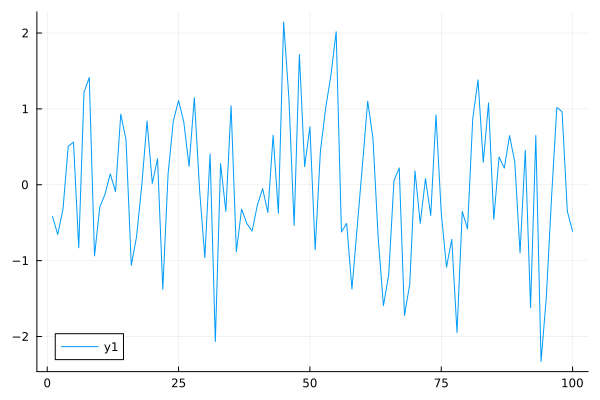

In [57]:
plot(1:100, randn(100))

### Macros

Macros are user-friendly wrappers for some Julia functions. In general, they allow to use specific functions while keeping a nice syntax. Two examples :

`@time` gives you some benchmark statistics about a given expression.

In [58]:
@time randn(150000)

  0.000570 seconds (2 allocations: 1.144 MiB)


150000-element Vector{Float64}:
 -0.3172266622620094
  2.0967250546058835
  0.42422061524100624
 -0.6754035970448686
  1.0325854045887035
 -0.4421719893052222
  0.49663763372547265
 -0.51998931286748
 -1.5822475220275833
 -1.5442431793716054
  ⋮
 -0.47098101389884484
  0.22687507417462502
  1.7689973723651493
  0.2664694975064329
 -0.17984542405102139
  0.3747194021128628
 -0.10453117584637554
  0.8445663844077479
  0.6606103208079077

`@info` is a fancy alternative to `println`, the basic function to log output to the console.

In [59]:
@info "Hi there !"

┌ Info: Hi there !
└ @ Main /home/josquin/Documents/Code/tutojulia/basics.ipynb:1


# Data manipulation 

see Pluto slides

## Broadcasting

Defined functions can be *broadcasted* over array elements using a dot or with `broadcast` or `map`.

## Getting help in Julia

For a quick help on a specific obejct while working, you can try adding a `?` in front of its name. (in a Jupyter notebook cell, use `@doc` instead)

In [60]:
@doc println

```
println([io::IO], xs...)
```

Print (using [`print`](@ref)) `xs` to `io` followed by a newline. If `io` is not supplied, prints to the default output stream [`stdout`](@ref).

See also [`printstyled`](@ref) to add colors etc.

# Examples

```jldoctest
julia> println("Hello, world")
Hello, world

julia> io = IOBuffer();

julia> println(io, "Hello", ',', " world.")

julia> String(take!(io))
"Hello, world.\n"
```


Alternatively, Julia package developpers are encouraged to maintain exhaustive documentation about their work. It's usually very easily findable online, just search for the function or module name !